# TITANIC SURVIVOR DATASET ANALYSIS
### Exploratory Data Analysis

https://www.kaggle.com/c/titanic/data?select=gender_submission.csv

In [1]:
#!pip install pandas_profiling --user

In [100]:
import pandas as pd
from pandas_profiling import ProfileReport
import math
import seaborn as sns

In [3]:
input_path='./../input/'
train_name="train.csv"
test_name="test.csv"

In [4]:
train_df=pd.read_csv(input_path+train_name)
test_df=pd.read_csv(input_path+test_name)

### 1. Quick overview

In [5]:
print(train_df.info())
print(train_df.columns)
train_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
#Pandas profiling analysis
data_profiling = ProfileReport(train_df, title='Titanic survivors report', explorative=True,orange_mode=True)
data_profiling.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusions on data after first analysis
1. Survived is the variable to predict
2. Missing data: age (20% missing) and cabin (77% missing) have high levels of missing data that need to be handleled
3. SibSp, Parch and fare present high number of zeros.


### Per variable analysis
#### Pedictors
- PassengerID: is just an ID with little value for the exercise.
- __Pclass__: the ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).3rd class accounted for 55%, followed by _1st class_ and finally 2nd class.
- __Name__: passenger name. This column needs further investigation and even some NLP could bring value to the model. Same surname people where sharing cabin.
- __Sex__:male (65%)/female (35%)
- __Age__: right skewed distribution but also 0 years bin is high. 117 missing values.Right _skewness of 0,39_ and _Kurtosis is 0,18_ Is this enough to approximate to a normal distribution __age~N(mu,sigma)?__ 
- __SibSp__: # of siblings / spouses aboard the Titanic. 68% of the people where traveling without siblings/spouse. "coetaneous"
- __Parch__: # of parents / children aboard the Titanic. 76% of the people where traveling without parents/children."no coetaneous"
- Ticket:ticket number. Not sure this attribute brings any value.
- __Embarked__: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)
- __Fare__: passenger fare. Highly skewed to the right, which means that most of the fares were low,which is consistent with the % of third class passengers. There are three recors with __512.3292__ far from the next most extreme __263__.Further analysis and relation with cabins.
- __Cabin__: cabin(s) number(s). This attirbute has 77% data missing. I understand for 3rd class there was not a specific cabin assigned, but 2nd class and even 1st class poor data quality...Is there any way to fill in data? or discard?




#### Objective variable
**Survived**: two class variable with not unbalanced class since **1 (38%)** and __0 (62%)__ .


### Features relations amoung themselves
#### Correlations
###### Pearson's correlation for linear correlation
Limitations are:
- Linear relations between __numerical variables only__
- No able to distinguis between independent and independent variables

Pclass vs. age  
Pclass vs. fare  
age vs Sib/Parch  
Sib vs Parch  

###### Phi_k correlation for linear correlation

<a href="https://phik.readthedocs.io/en/latest/#:~:text=Phi_K%20is%20a%20new%20and,categorical%2C%20ordinal%20and%20interval%20variables.">More info regarding Phi correlation</a>

Is an improvement of standard correlation coefficients. It has the following advantages:
- It works consistently between __categorical, ordinal and interval variables__
- It captures __non-linear dependency__
- It reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution

sex vs.survived  
Pclass vs Embarked  
Fare vs. Pclass  
Embarked vs. Pclass  


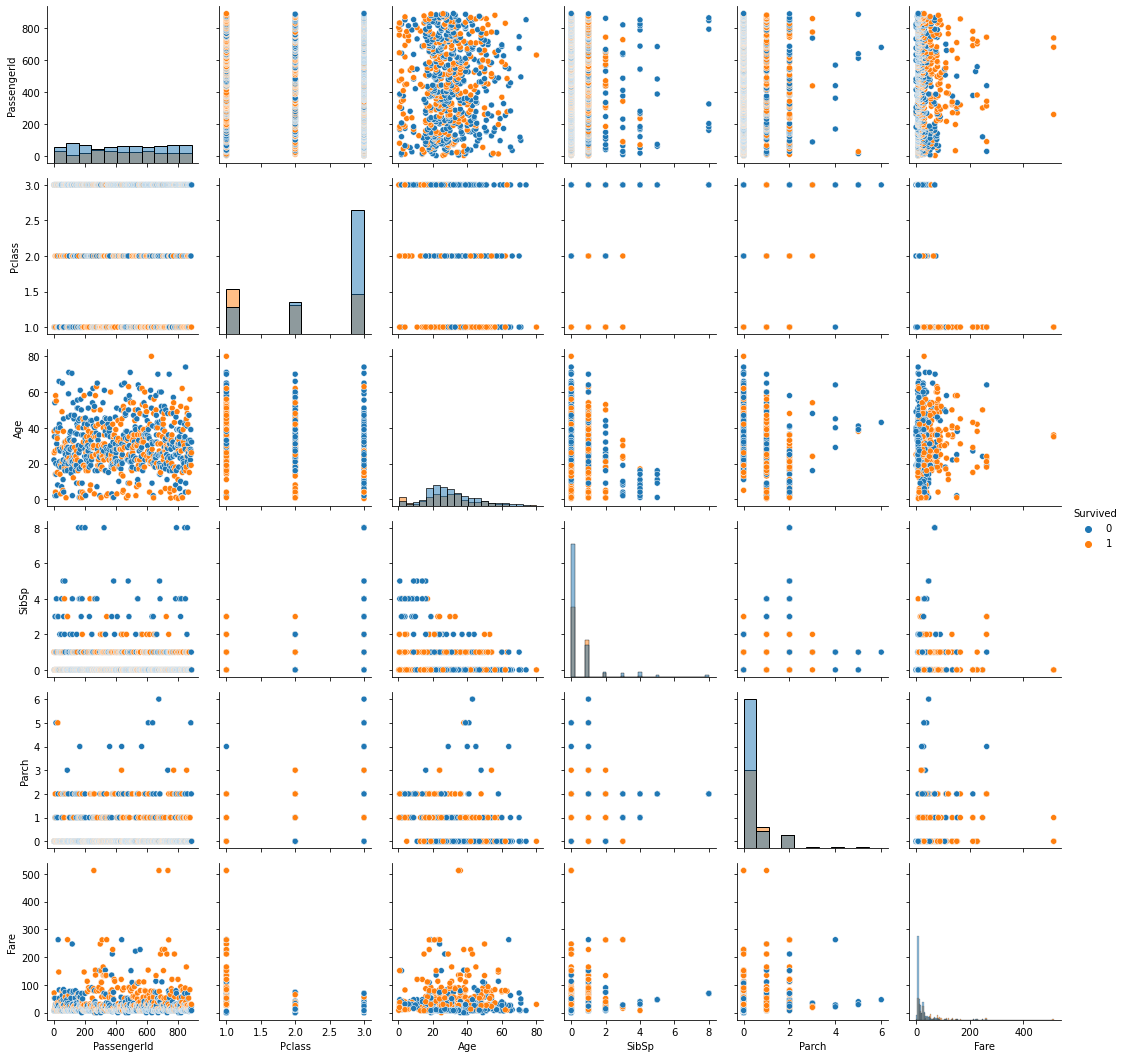

In [147]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.PairGrid(train_df, hue="Survived")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Relation between objective variable and predictors
How does survived correlates with predictors?
Survive vs. PClass 
Survive vs. fare
Survive vs. Sex(Phik)


### Pclass

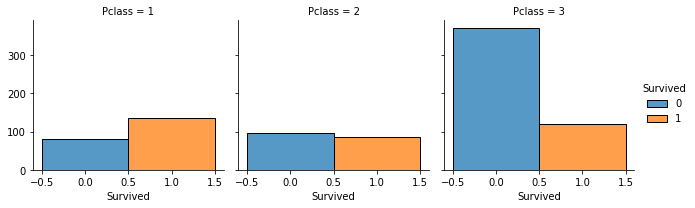

In [164]:
g = sns.FacetGrid(train_df, col='Pclass',hue="Survived")
g.map(sns.histplot, "Survived")
g.add_legend()

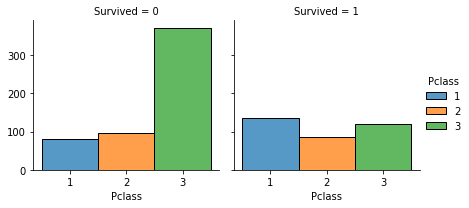

In [165]:
g = sns.FacetGrid(train_df, col='Survived',hue="Pclass")
g.map(sns.histplot, "Pclass")
g.add_legend()

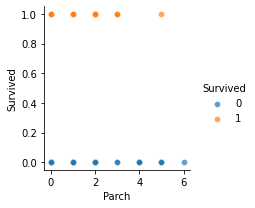

In [135]:
g = sns.FacetGrid(train_df, hue="Survived",margin_titles=True)
g.map(sns.scatterplot, 'Parch', "Survived", alpha=.7)
g.add_legend()

In [ ]:
#g = sns.FacetGrid(train_df, col="Survived", hue="Survived")
for i in range(train_df.shape[1]):
    
    g = sns.FacetGrid(train_df, hue="Survived")
    g.map(sns.scatterplot, train_df.iloc[i], "Survived", alpha=.7)
    g.add_legend()

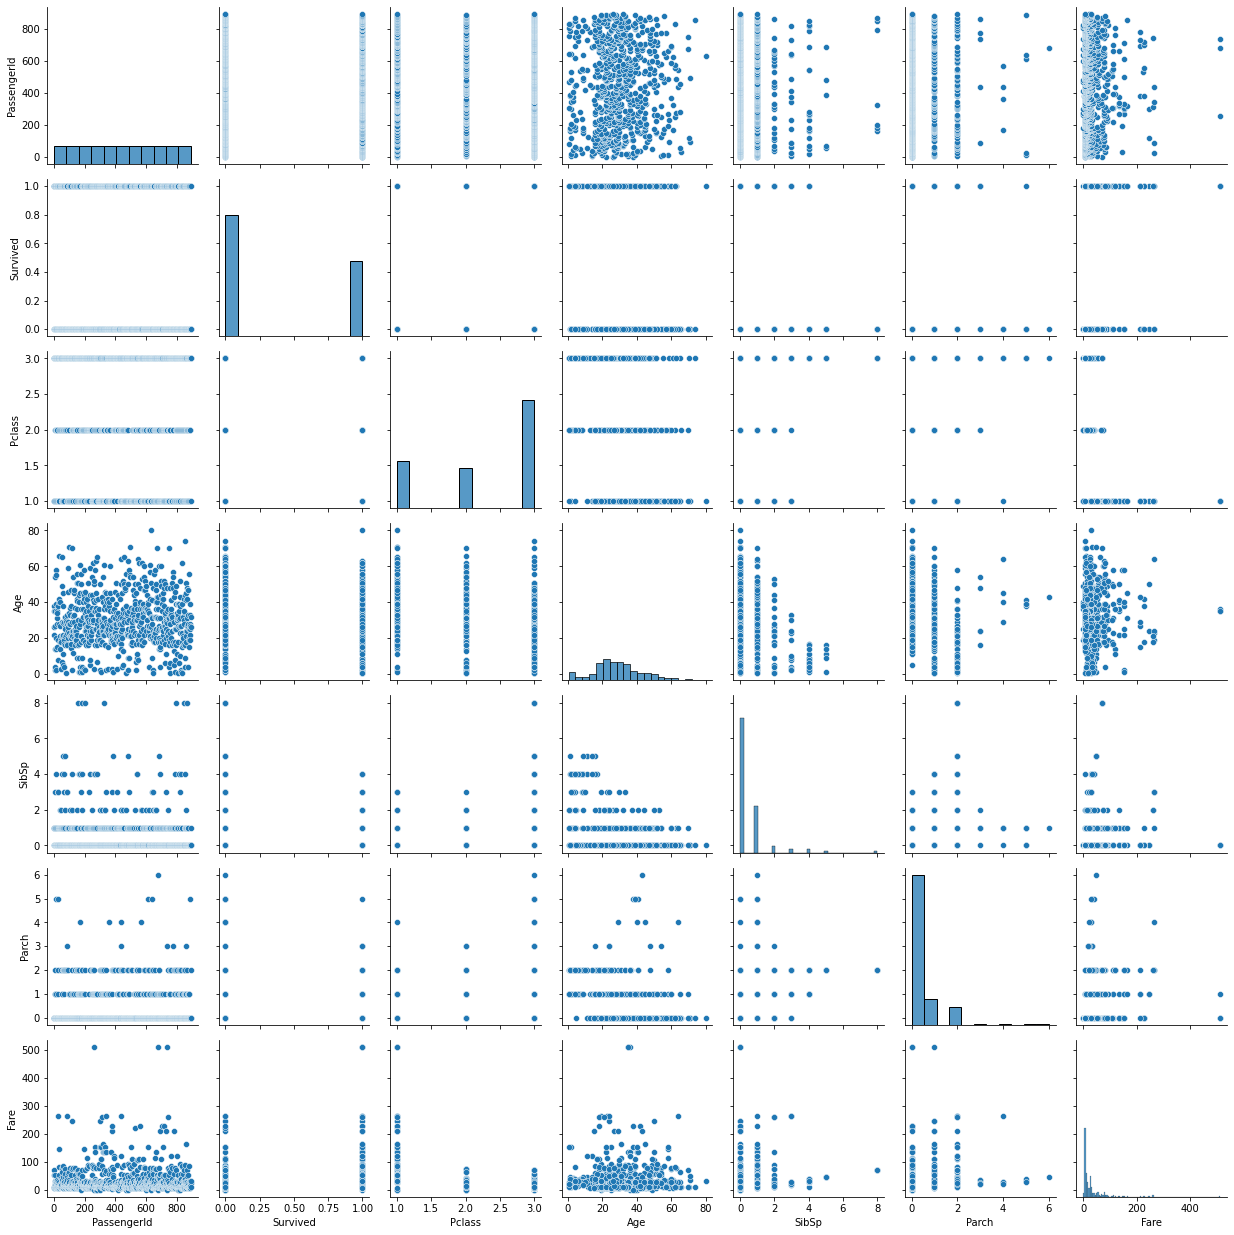

<AxesSubplot:xlabel='Age', ylabel='Survived'>

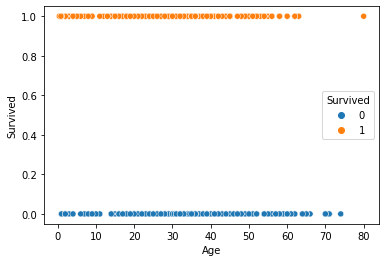

In [142]:
sns.scatterplot(data=train_df,x='Age',y=y_variable,hue=y_variable)

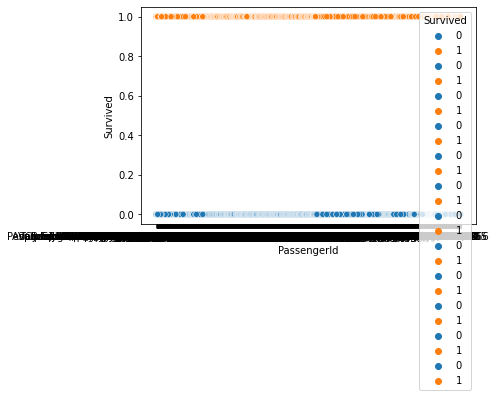

In [143]:
for i in range(train_df.shape[1]):
    sns.scatterplot(data=train_df,x=train_df.columns[i],y=y_variable,hue=y_variable)

### Data cleanising
#### Age

#### Cabin

### New variables
Number of cabins booked
family: those who have at least one Sib AND at least 1 Parch (0/1)
cabin letter